<p style="font-weight:600; font-size:30px; color:yellow; padding-left:8px;">
    <b>Prediction and Testing</b>
</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Scaled_Cleaned_Dataset.csv')
data = df.copy()
data

,Gender,Age,Sleep Duration,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic_BP,Diastolic_BP,Quality_of_Sleep
0,1,-1.753096,-1.298887,-0.825418,0.347021,3,1.654719,-1.619584,1,-0.330002,-0.330002,6
1,1,-1.637643,-1.173036,0.039844,1.475592,0,1.170474,1.970077,1,-0.459239,-0.459239,6
2,1,-1.637643,-1.173036,0.039844,1.475592,0,1.170474,1.970077,1,-0.459239,-0.459239,6
3,1,-1.637643,-1.550588,-1.402260,1.475592,2,3.591698,-2.362273,2,1.479309,1.479309,4
4,1,-1.637643,-1.550588,-1.402260,1.475592,2,3.591698,-2.362273,2,1.479309,1.479309,4
...,...,...,...,...,...,...,...,...,...,...,...,...
369,0,1.941401,1.218127,0.760896,-1.345836,3,-0.524383,0.113356,2,1.479309,1.479309,9
370,0,1.941401,1.092276,0.760896,-1.345836,3,-0.524383,0.113356,2,1.479309,1.479309,9
371,0,1.941401,1.218127,0.760896,-1.345836,3,-0.524383,0.113356,2,1.479309,1.479309,9
372,0,1.941401,1.218127,0.760896,-1.345836,3,-0.524383,0.113356,2,1.479309,1.479309,9


In [3]:
main = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
categorical_main = list(main.select_dtypes(include='object').columns)
categorical_main

['Gender', 'Occupation', 'BMI Category', 'Blood Pressure', 'Sleep Disorder']

In [4]:
numerical_main = list(main.select_dtypes(include='number').columns)
numerical_main

['Person ID',
 'Age',
 'Sleep Duration',
 'Quality of Sleep',
 'Physical Activity Level',
 'Stress Level',
 'Heart Rate',
 'Daily Steps']

In [5]:
categorical_main.remove('Occupation')
categorical_main

['Gender', 'BMI Category', 'Blood Pressure', 'Sleep Disorder']

In [6]:
scaled_numerical = list(data.select_dtypes(include='number').columns)
scaled_numerical

['Gender',
 'Age',
 'Sleep Duration',
 'Physical Activity Level',
 'Stress Level',
 'BMI Category',
 'Heart Rate',
 'Daily Steps',
 'Sleep Disorder',
 'Systolic_BP',
 'Diastolic_BP',
 'Quality_of_Sleep']

In [7]:
bmi_encoded = pd.read_csv('BMI_encoded.csv')
print(bmi_encoded)
gender_encoded = pd.read_csv('Gender_encoded.csv')
print(gender_encoded)
sleep_disorder_encoded = pd.read_csv('Sleep_disorder_encoded.csv')
print(sleep_disorder_encoded)

   Encoded     BMI_type
0        0       Normal
1        2   Overweight
2        1        Obese
3        3  Underweight
   Encoded  Gender
0        1    Male
1        0  Female
   Encoded Sleep_disorder
0        1         Normal
1        0       Insomnia
2        2    Sleep Apnea


In [18]:
import joblib
import numpy as np

# ==============================
# Load Scaler and Models
# ==============================
with open("scaler.pkl", "rb") as f:
    scalers = joblib.load(f)   # dict of scalers (one per column)

model_names = ["GradientBoosting_model.pkl", "KNN_model.pkl", 
               "RandomForest_model.pkl", "DecisionTree_model.pkl", 
               "LinearRegression_model.pkl", "SVR_model.pkl"]

models = []
for name in model_names:
    with open(name, "rb") as f:
        models.append(joblib.load(f))

# ==============================
# Encoders (mapping)
# ==============================
gender_map = {"Male": 1, "Female": 0}
bmi_map = {"Normal": 0, "Obese": 1, "Overweight": 2, "Underweight": 3}
sleep_map = {"Normal": 1, "Insomnia": 0, "Sleep Apnea": 2}

# Column order for numerical features
numerical_cols = [
    'Age', 'Sleep Duration', 'Physical Activity Level',
    'Stress Level', 'Heart Rate', 'Daily Steps',
    'Systolic_BP', 'Diastolic_BP'
]

# ==============================
# Function to take input
# ==============================
def get_user_input():
    data = {}

    # Categorical inputs
    data['Gender'] = input("Enter Gender (Male/Female): ").strip()
    data['BMI Category'] = input("Enter BMI Category (Normal/Obese/Overweight/Underweight): ").strip()
    data['Sleep Disorder'] = input("Enter Sleep Disorder (Normal/Insomnia/Sleep Apnea): ").strip()

    # Numerical inputs
    data['Age'] = float(input("Enter Age: "))
    sleep_duration = float(input("Enter Sleep Duration (hours): "))
    data['Sleep Duration'] = 12 - sleep_duration
    data['Physical Activity Level'] = float(input("Enter Physical Activity Level (minutes/day): "))
    data['Stress Level'] = float(input("Enter Stress Level (1-10): "))
    data['Heart Rate'] = float(input("Enter Heart Rate: "))
    data['Daily Steps'] = float(input("Enter Daily Steps: "))
    data['Systolic_BP'] = float(input("Enter Systolic BP: "))
    data['Diastolic_BP'] = float(input("Enter Diastolic BP: "))

    return data

# ==============================
# Preprocess input
# ==============================
def preprocess_input(data):
    # Encode categorical
    gender = gender_map[data['Gender']]
    bmi = bmi_map[data['BMI Category']]
    sleep = sleep_map[data['Sleep Disorder']]

    # Scale numerical values column by column
    numerical_scaled = []
    for col in numerical_cols:
        value = np.array([[data[col]]])  # make 2D for transform
        scaled_val = scalers[col].transform(value)[0][0]
        numerical_scaled.append(scaled_val)

    # Final feature vector
    features = np.hstack([gender, bmi, sleep, numerical_scaled])
    return features.reshape(1, -1)

# ==============================
# Prediction
# ==============================
def predict_sleep_score(features):
    predictions = []
    for model in models:
        pred = model.predict(features)[0]
        predictions.append(pred)

    final_pred = np.mean(predictions)
    return predictions, final_pred

# ==============================
# Run the pipeline
# ==============================
if __name__ == "__main__":
    user_data = get_user_input()
    features = preprocess_input(user_data)
    all_preds, avg_pred = predict_sleep_score(features)

    print("\nModel Predictions:", all_preds)
    print("Final Averaged Prediction:", avg_pred)


Enter Gender (Male/Female):  Male
Enter BMI Category (Normal/Obese/Overweight/Underweight):  Normal
Enter Sleep Disorder (Normal/Insomnia/Sleep Apnea):  Normal
Enter Age:  78
Enter Sleep Duration (hours):  4
Enter Physical Activity Level (minutes/day):  0
Enter Stress Level (1-10):  10
Enter Heart Rate:  100
Enter Daily Steps:  100
Enter Systolic BP:  280
Enter Diastolic BP:  180



Model Predictions: [6.9076937401819025, 6.0, 7.14, 8.0, 5.880019949668168, 7.0483789697169055]
Final Averaged Prediction: 6.829348776594497


In [11]:
import sys
print(sys.version)


3.12.4 | packaged by Anaconda, Inc. | (main, Jun 18 2024, 15:03:56) [MSC v.1929 64 bit (AMD64)]


<Axes: >

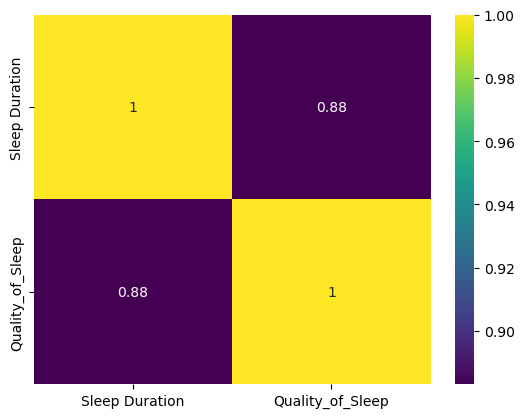

In [16]:
correlation = data[['Sleep Duration', 'Quality_of_Sleep']].corr()

import seaborn as sns

sns.heatmap(correlation, annot=True, cmap='viridis')

<Axes: >

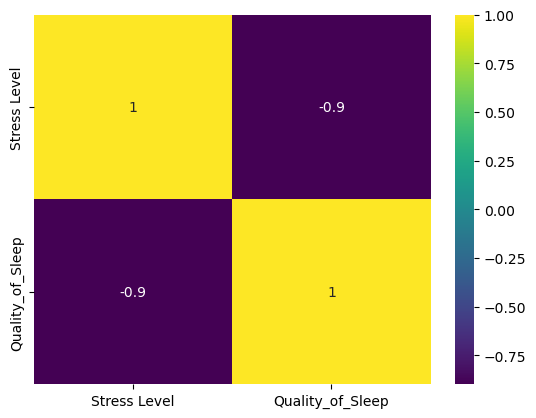

In [19]:
correlation = data[['Stress Level', 'Quality_of_Sleep']].corr()

import seaborn as sns

sns.heatmap(correlation, annot=True, cmap='viridis')